# FEATURE SELECTION NOTEBOOK
Felix A. Westphal
DLMDWME01

### Import

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

### Parameter

In [192]:
FILE_PATH_NORMALIZED_DATA = r"../data/processed/Normalized_Input_Data.csv"
FILE_PATH_BALANCED_DATA = r"../data/processed/Balanced_Input_Data.csv"
NUM_TARGET_FEATURES = 10

### Load Data

In [193]:
input_data = pd.read_csv(FILE_PATH_NORMALIZED_DATA, parse_dates=[0])                        # Load input data file
print(f"Data loaded from Excel: \n{input_data.head()}")

Data loaded from Excel: 
                 tmsp    amount  success  3D_secured  Austria  Germany  \
0 2019-01-01 00:01:11  0.133013    False       False    False     True   
1 2019-01-01 00:01:17  0.133013     True       False    False     True   
2 2019-01-01 00:02:49  0.371795    False        True    False     True   
3 2019-01-01 00:03:13  0.371795     True        True    False     True   
4 2019-01-01 00:04:33  0.189103    False       False     True    False   

   Switzerland  Goldcard  Moneycard  Simplecard  UK_Card  Diners  Master  \
0        False     False      False       False     True   False   False   
1        False     False      False       False     True   False   False   
2        False     False      False       False     True    True   False   
3        False     False      False       False     True    True   False   
4        False     False      False        True    False    True   False   

    Visa  num_tries  order_id      hour  is_weekend  
0   True          1

### Univariate Selection

In [194]:
model_data = input_data.drop('tmsp', axis=1)                                                         # Remove timestamp column for training
model_data = model_data[model_data['num_tries'] == 1]
model_data = model_data.drop('order_id', axis=1)

X = model_data.drop('success', axis=1)                                                                  # Features
y = model_data['success']                                                                               # Target Variable

# --- Select k best features
bestfeatures = SelectKBest(score_func=chi2, k=NUM_TARGET_FEATURES)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(NUM_TARGET_FEATURES,'Score'))

         Specs       Score
5     Goldcard  727.620651
1   3D_secured  169.634497
7   Simplecard  127.337363
14  is_weekend   28.528171
0       amount   19.112297
13        hour   19.112297
9       Diners   18.497466
8      UK_Card   13.263579
6    Moneycard    8.796542
10      Master    6.541912


### Feature Importance

[0.42955103 0.02991607 0.0044718  0.00450214 0.00471276 0.03499014
 0.00675846 0.00914993 0.00963673 0.00593861 0.00737959 0.00720371
 0.         0.43066509 0.01512395]


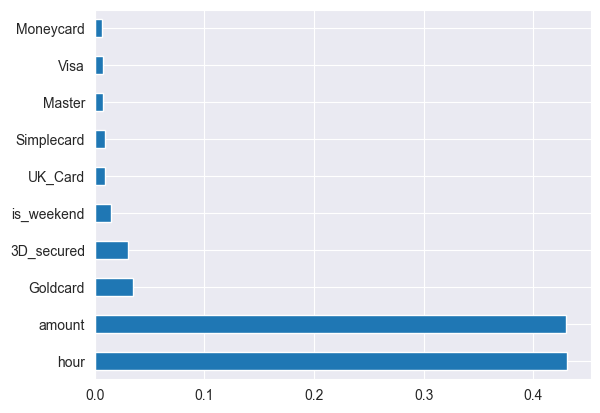

In [195]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(NUM_TARGET_FEATURES).plot(kind='barh')
plt.show()